In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Base_Dados = pd.read_excel('BaseDados_RegressaoLogistica.xlsx')

In [3]:
Base_Dados.head(100)

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0
...,...,...,...,...,...
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1


In [4]:
Base_Dados.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


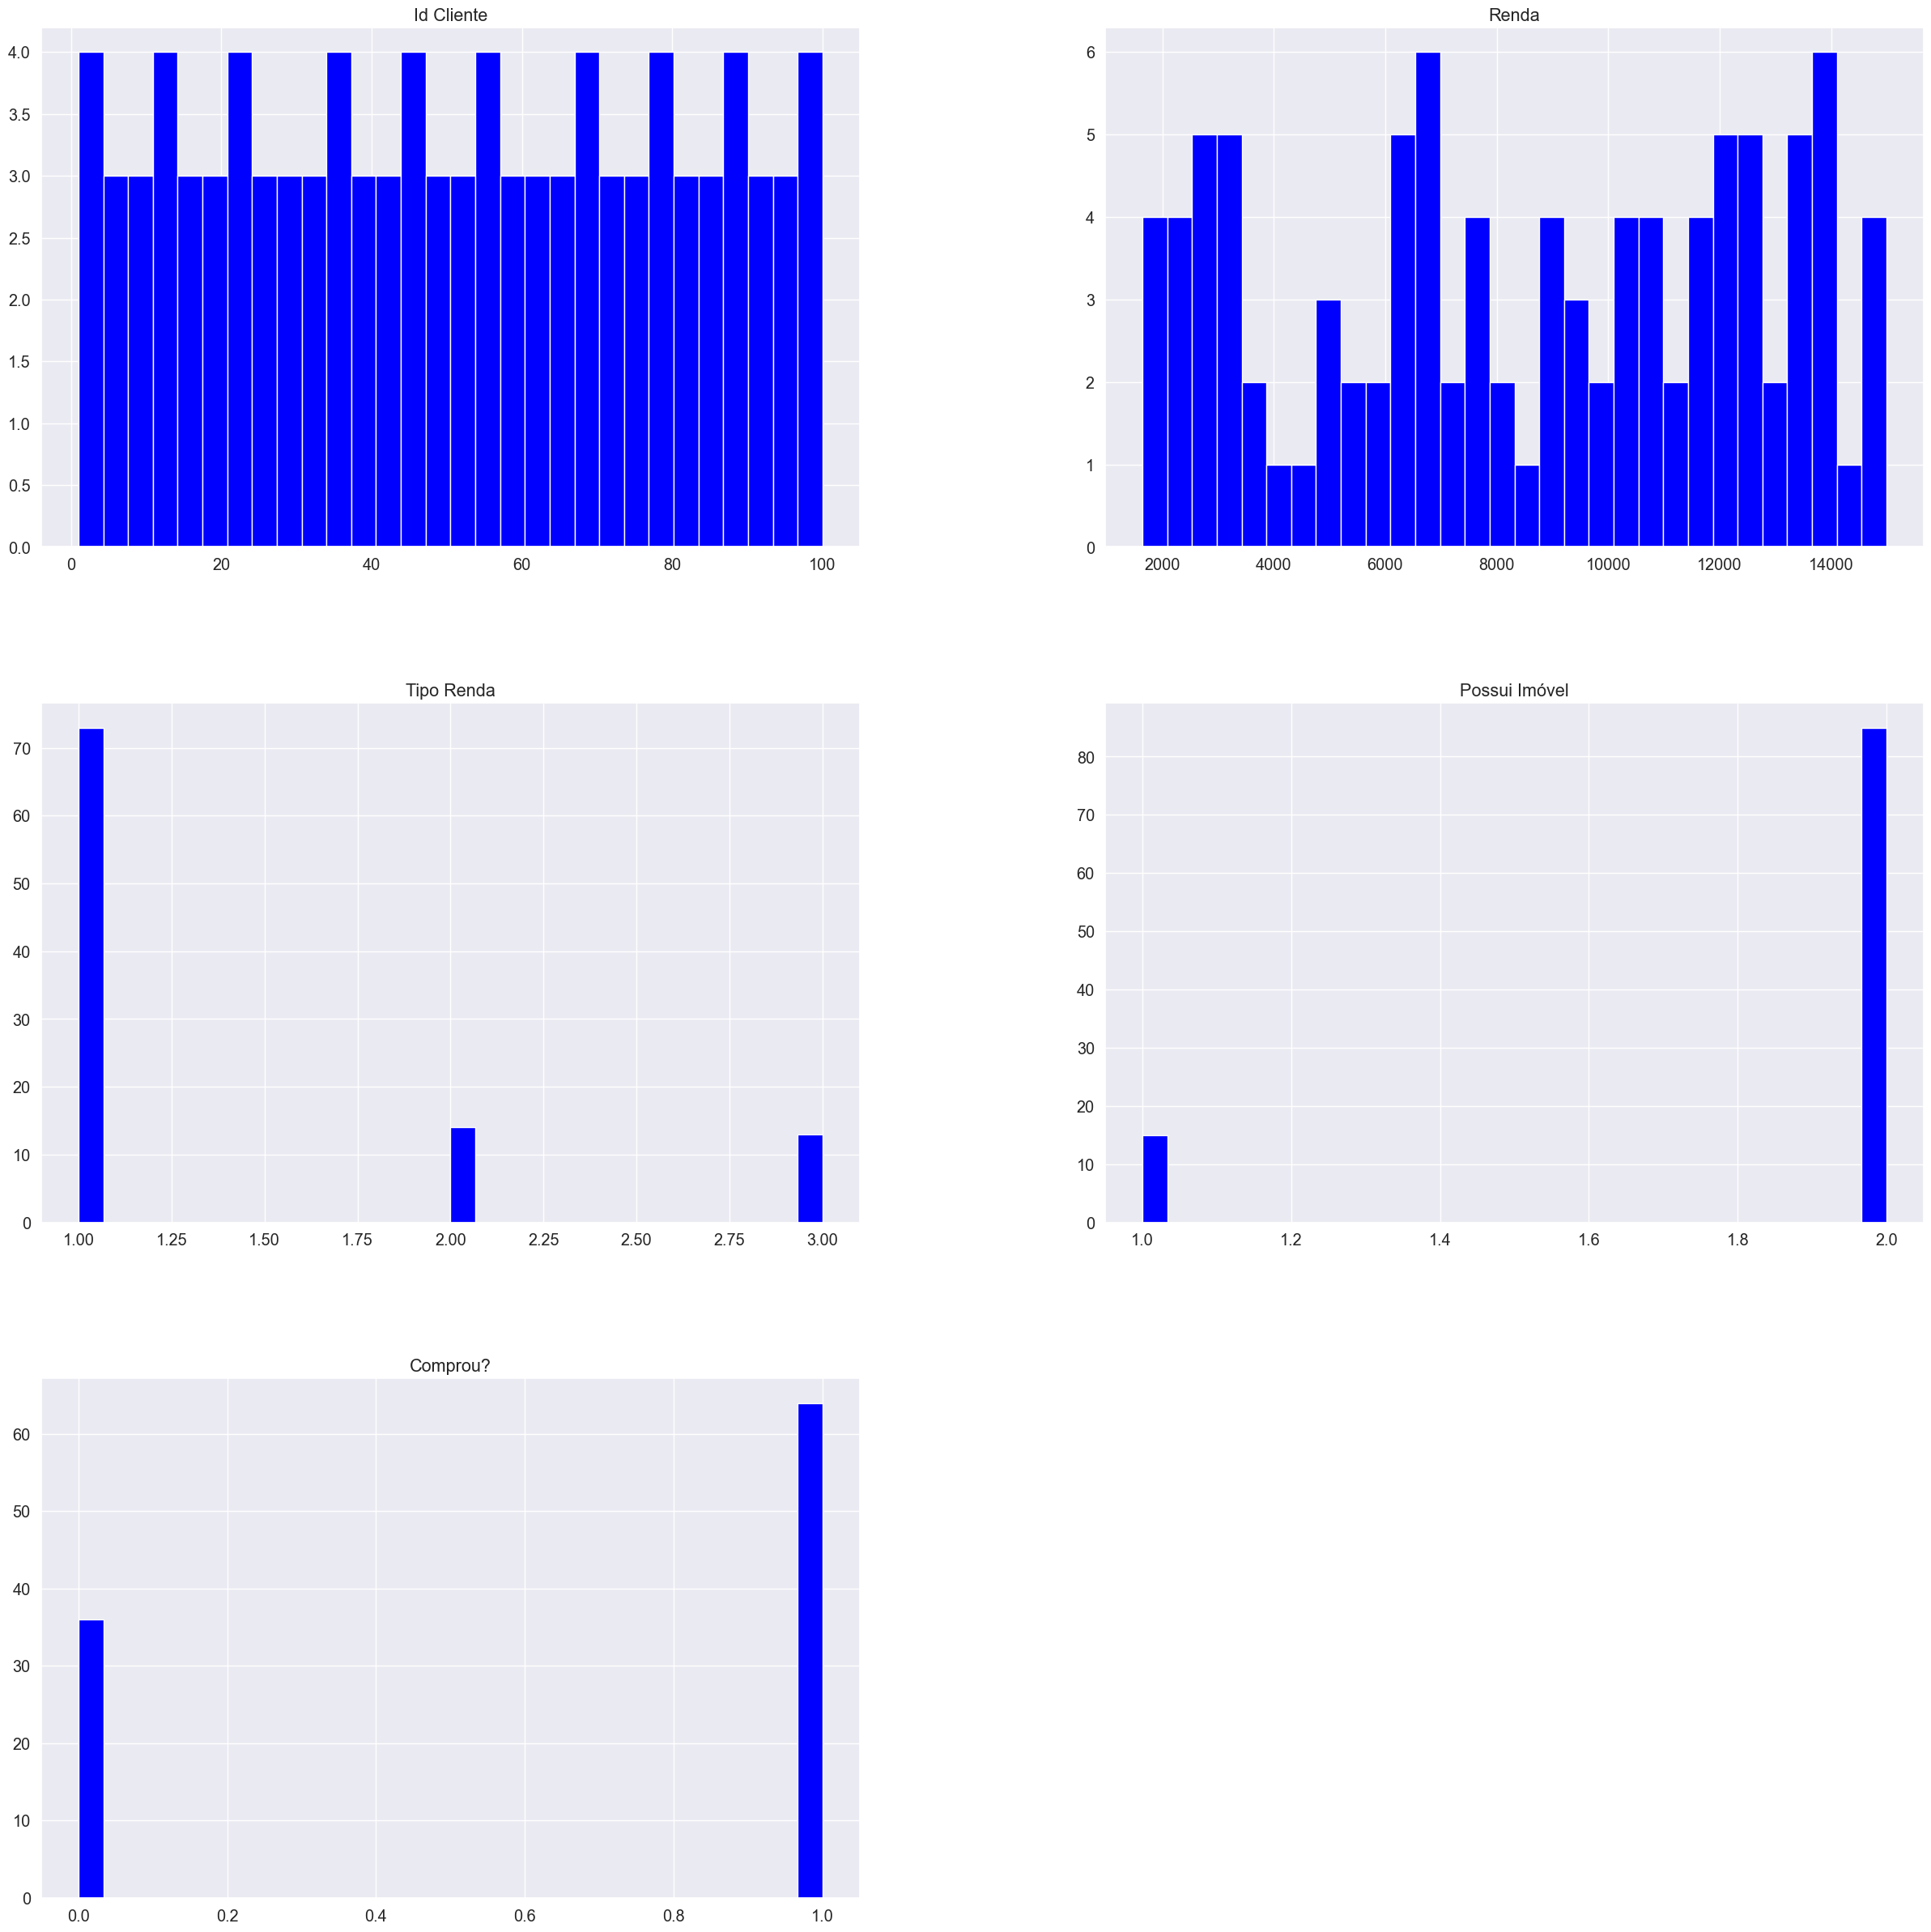

In [5]:
sns.set(font_scale=1.3, rc={'figure.figsize': (30, 30)})
eixo = Base_Dados.hist(bins = 30, color='blue')

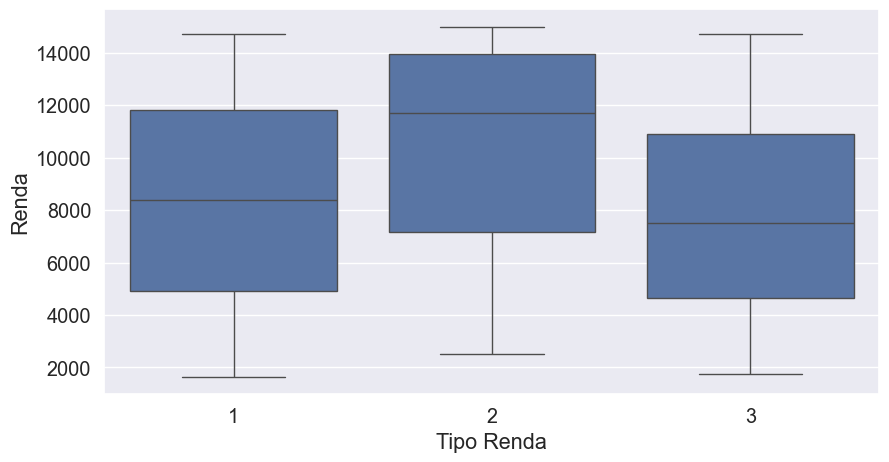

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Base_Dados, x= 'Tipo Renda', y='Renda');

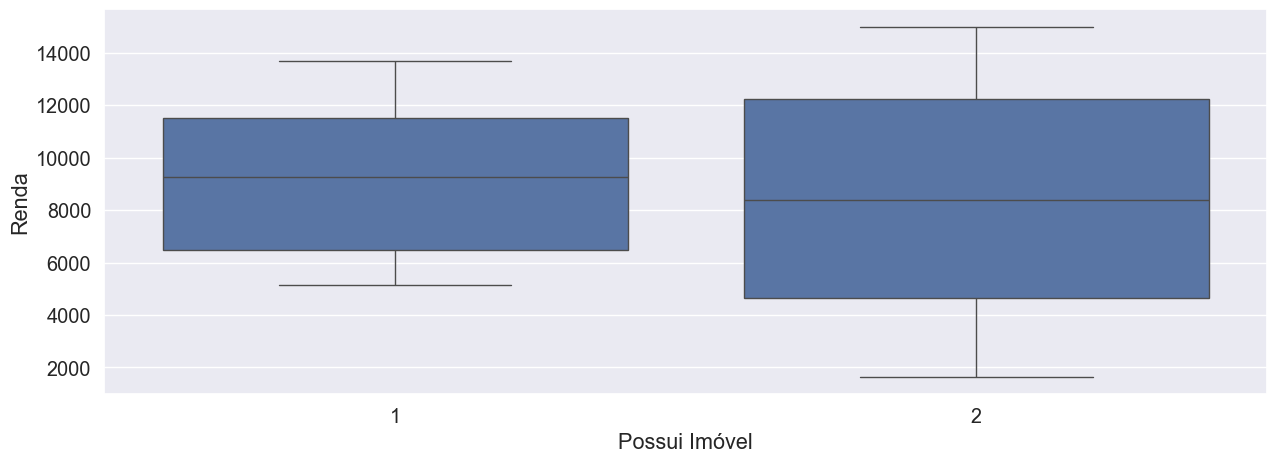

In [7]:
plt.figure(figsize=(15,5))
sns.boxplot(data=Base_Dados, x= 'Possui Imóvel', y='Renda');

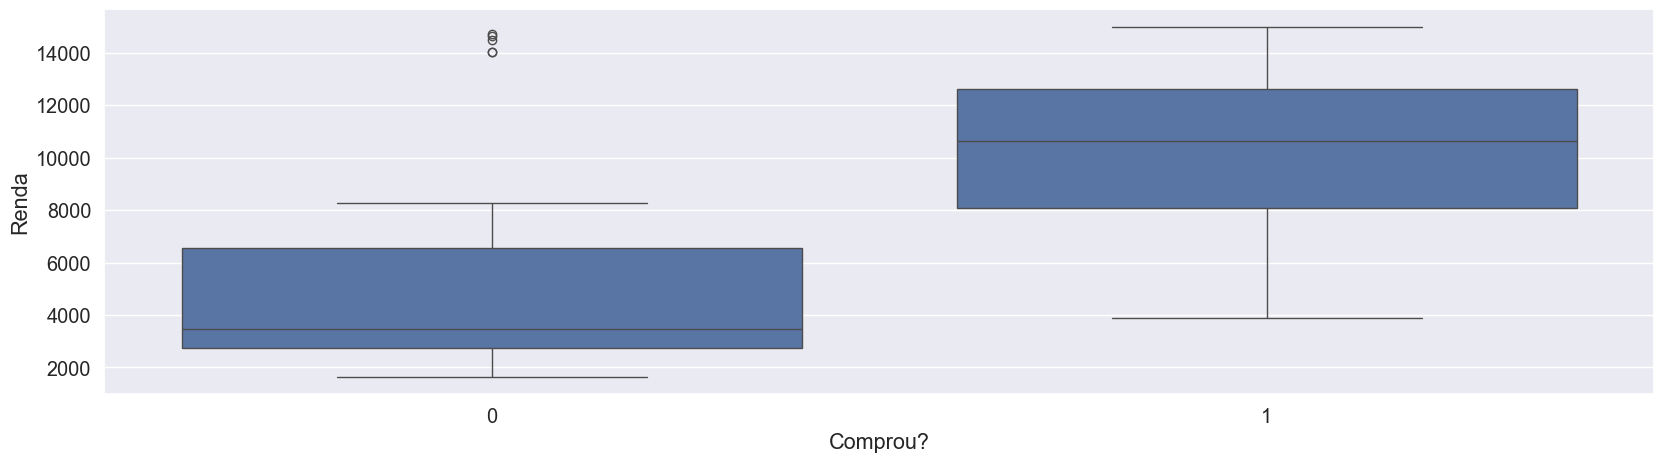

In [8]:
plt.figure(figsize=(20,5))
sns.boxplot(data=Base_Dados, x= 'Comprou?', y='Renda');

<Axes: xlabel='Renda', ylabel='Comprou?'>

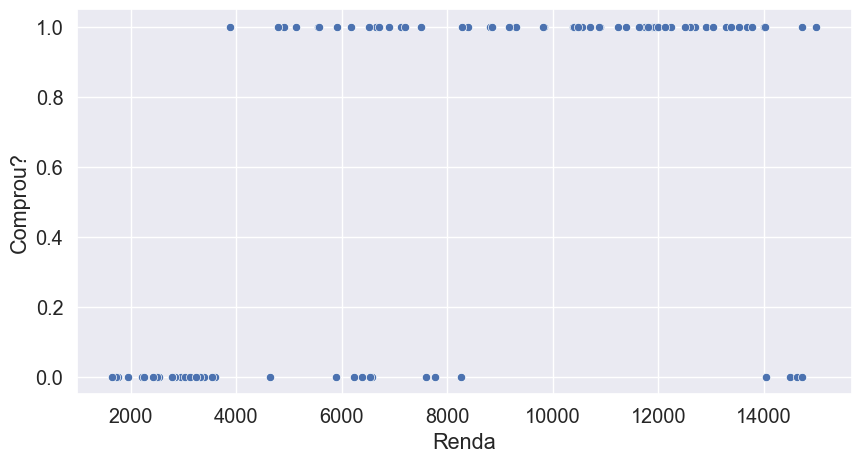

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = Base_Dados, x='Renda', y='Comprou?')

In [10]:
Caracteristica = Base_Dados.iloc[:, 1:4].values
Previsor =  Base_Dados.iloc[:,4:5].values

In [11]:
from sklearn.model_selection import train_test_split


x_treino, x_teste, y_treino, y_teste = train_test_split(Caracteristica,
                                                        Previsor,
                                                        test_size=0.30)


In [12]:
print(len(x_treino))
print(len(x_teste))

70
30


In [13]:

from sklearn.linear_model import LogisticRegression

Funcao_Logistica = LogisticRegression()
Funcao_Logistica.fit(x_treino, y_treino)

c:\Users\lucas.oliveira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
Previsoes = Funcao_Logistica.predict(x_teste)

In [15]:
Previsoes

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [16]:
print(y_teste)

[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]


In [17]:
print('Previsoes || Teste')
for i in range(len(Previsoes)):
  print(Previsoes[i],'             ', y_teste[i][0])

Previsoes || Teste
0               0
1               1
1               1
1               0
0               0
1               1
0               0
1               0
1               0
1               1
0               1
1               0
1               1
1               1
1               1
0               1
1               1
1               0
1               1
1               1
1               1
0               1
1               1
1               1
1               1
0               1
0               0
1               1
1               1
1               1


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste, Previsoes)

array([[ 4,  5],
       [ 4, 17]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, Previsoes))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.77      0.81      0.79        21

    accuracy                           0.70        30
   macro avg       0.64      0.63      0.63        30
weighted avg       0.69      0.70      0.69        30



# Descrição:

# Tipo_renda:
1. Assalariado
2. Autônomo
3. Empresário

#Possui Imóvel:
1. Não Possuí
2. Possuí

# Comprou?:
0. Não Comprou
2. Comprou








In [20]:
salario = int(input('Digite o valor do salário do cliente: '))
Tipo_Renda = int(input('Digite o tipo da renda do cliente:\n 1. Assalariado \n 2. Autônomo \n 3. Empresário\n'))
Possui_Imovel = int(input('Digite se o cliente possuí imóvel:\n 1. Não Possuí \n 2. Possuí\n'))

Parametro = [[salario, Tipo_Renda, Possui_Imovel]]

Fazendo_Previsao = Funcao_Logistica.predict(Parametro)
probabilidade = Funcao_Logistica.predict_proba(Parametro)

if Fazendo_Previsao == 0:
  print('Não vai comprar')
  print( probabilidade )
else:
  print('Vai Comprar!! \o/')
  print( probabilidade )


